# Simplifying Intraday Market Analysis: Unveiling Insights for Traders and Analysts
Intraday market analysis is a powerful practice that enables traders and analysts to uncover valuable insights, make informed decisions, and facilitates the analysis and interpretation of key market trends and patterns. From equity and bond traders to derivative traders, professionals across different financial sectors harness the benefits of intraday analysis to navigate dynamic markets and capitalize on opportunities.  In this article, we explore the simplicity of generating intraday market reports, enabling traders and analysts to delve into the analysis and gain actionable insights.

The simplicity of generating intraday market reports lays the foundation for focused analysis. Traders can easily identify and analyze price patterns, detect market trends, and explore potential trading opportunities. Analysts, armed with comprehensive reports, can delve into detailed market behavior, study volume dynamics, and make well-informed recommendations.

## Getting Started
For this analysis, we plan to utilize content available within [LSEG's comprehensive data set](https://www.lseg.com/en/data-indices-analytics/data#data-coverage).  To programmatically access this data, we will need to import the Refinitiv Data (RD) Library responsible for generating the historical intraday prices and volumes. For presentation, we have built out modules within separate helper classes that depend on some popular charting packages we'll use to highlight trends and anomolies within the data.

In [1]:
# Refinitiv Library
import refinitiv.data as rd

# Load helper class
from helper import Intraday, DatePicker

rd.__version__

'1.2.0'

In [2]:
# Open a session to retrieve historical content 
rd.open_session()

<refinitiv.data.session.Definition object at 0x7f8b88df40a0 {name='codebook'}>

## Packaged Components
To simplify processing and aid in the presentation of the following workflow, we have packaged up some of the common functionality within separate helper classes.  While these components are important and greatly simplify the capture and presentation of our measures, we will leave it to the reader to review these interfaces at their leisure. Throughout this workflow, we will highlight and demonstrate the capabilities of each.

The following packages have been defined:

 * **Intraday**
 
 The *Intraday* class is responsible for generating the historical intraday summaries.  The interface supports the ability to accept multiple dates along with a time window representing the trading hours for the selected instrument.  Based on this criteria, the interface will generate both the intraday prices as well as the intraday volumes.  In addition, the algorithm will take care of evaluating the timezone in which the instrument trades and adjust the *trading window* to ensure relevant summaries are captured.  Prices can be represented natively or measured as a relative percentage or net change.  Finally, with the prepared measures, the interface also supports the ability to retrieve both the prices and volumes within the trading window for any additional analysis.

In [3]:
# Define an instance of our Intraday helper class
intraday = Intraday()

# Uncomment to view the features available within this interface
#help(intraday)

 * **DatePicker**
 
 The *DatePicker* class is a convenient interface to present a simple mechanism to manually capture dates and the trading window time range.  These captured values can be used in the above *Intraday* interface as a simple mechanism to measure trends for a given instrument.

In [4]:
# Define an instance of our DatePicker helper class
date_picker = DatePicker()

# Uncomment to view the features available within this interface
#help(date_picker)

## Analysis
To begin our analysis, let's define our instrument we wish to analyze - this specification will be used throughout this notebook.  Based on the specified instrument, you may need to adjust the normal trading day window.  **Note**: Depending on the specific dates you choose to measures, it is important to understand when choosing the times for the trading window, the dates may span over DST (Daylight Savings Time).  In such a situation, you can expand the trading window.

In [5]:
# Define the Commodity instrument used throughout the analysis
instrument = 'Cv1'    # Commodity (Corn)

In [6]:
# From our DataPicker class, choose the trading window time...
# Note: The 'date_picker' will display 2 calendars.  You will only need to choose the 'time' elements for each
#       representing your desired trading window.
date_picker.select_times()


Override time range:


DatetimePicker(css='border: 2px solid green; width: 300px; border-radius: 20px', duplex_mode='split', range_mo…

### World Agricultural Supply and Demand Estimates (WASDE)
To begin our analysis, we'll capture the monthly reported dates published by the United States Department of Agriculture (USDA) providing a comprehensive forecast of supply and demand for major crops (global and United States) and livestock.  This particular service provides monthly forecasts **during market hours** - which is important as we want to detect specific activity during the trading day.  The release dates are subject to change, but they have generally fallen around the 10th or 11th business day of the month.

To demonstrate, we'll capture the 5 most recent estimates as the basis of our analysis:

In [10]:
# Extract the last 5 dates (monthly) from the USDA World Agricultural Supply and Demand Estimates
df = rd.get_history(universe=['C-CROP-ENDM0'])
dates = [dt.to_pydatetime().date() for dt in df.index][-5:]

With our dates and trading window defined, we can now utilize the *Intraday* interface to calculate our measures for the defined instrument:

In [11]:
# Look how the prices flucuated throughout the day - price net change
intraday.calculate_measures(instrument, dates, date_picker.time_range, 'net')

ProgressBar(color='green', tooltip='')

Processing...
**Done


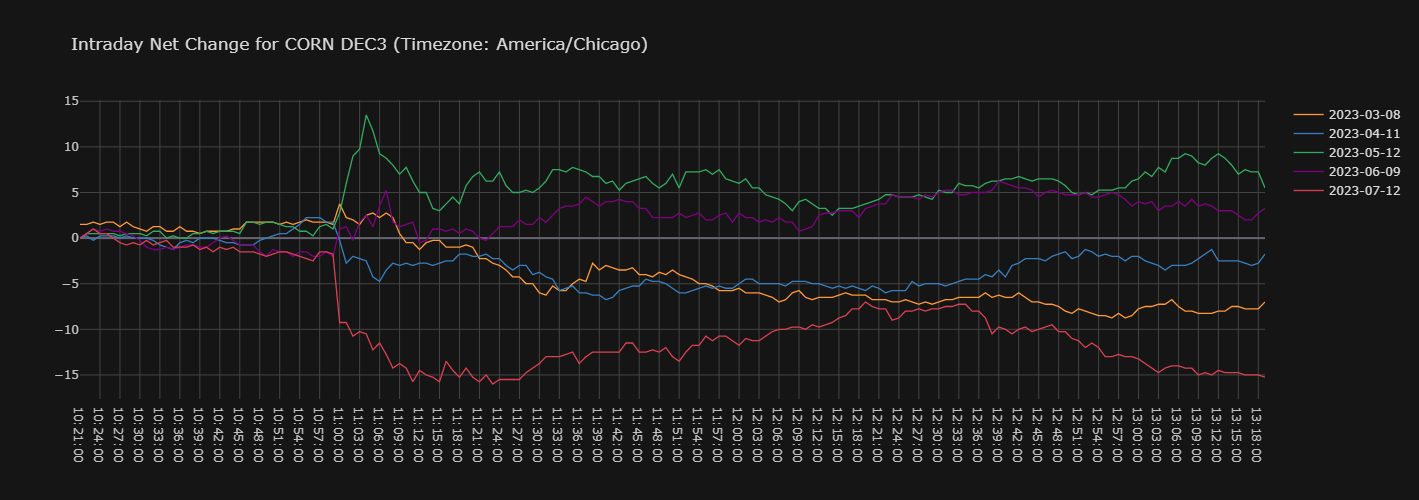

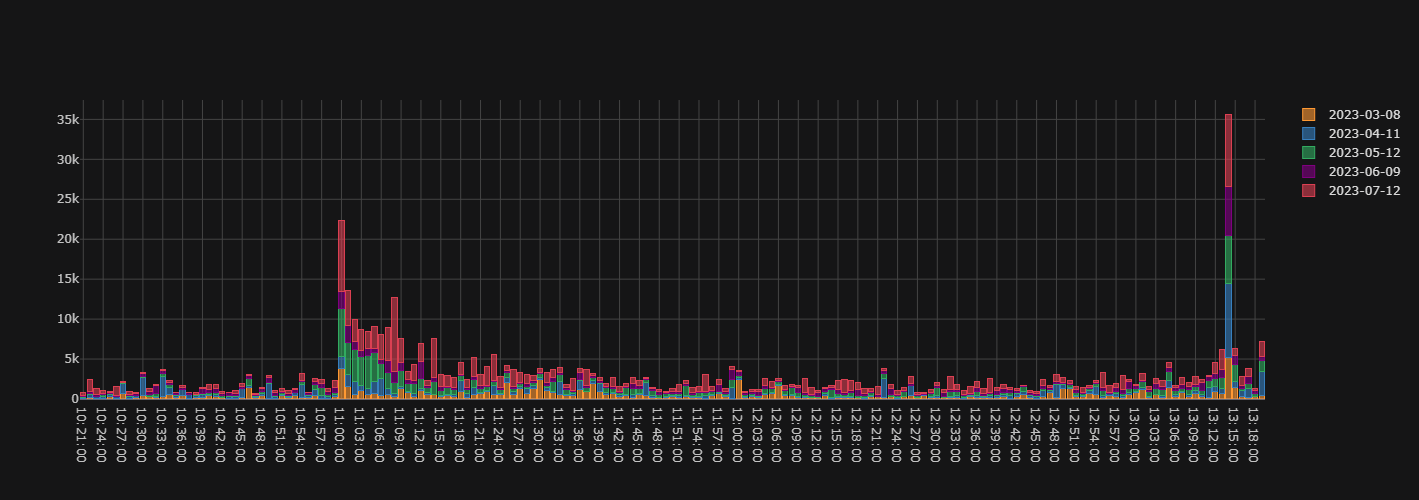

In [12]:
# Plot the results and place the following text as part of the title of the chart
intraday.plot(f"Intraday Net Change for {intraday.label}")

In the above code segment, we have requested the five most recent estimates based on the WASDE reported dates.  In the top chart, if you zoom in, you can begin to see a flurry of activity a few minutes before 11:00 A.M ahead of the report. At the time of the report, the bottom chart clearly shows a significant number of contracts traded.  In addition, you can also generally compare the volumes at certain dates and the rapid change in volume compared to other estimates.  For example, for whatever reason, the April and June reports have relatively light trading vs the other ones. This is also reflective in the above price chart where for these months, the impact on the price is less significant.  It is these types of insight that can indicate a deeper analysis that may provide better predictions.  In addition, the July report also generated a significant volume of contacts traded around 8 minutes after the report - perhaps a reaction to the price continually dropping or the immediate drop in price prior to the estimate coming out.

We can go on - but the point is we have presented tools to generate interesting insight that could warrant further investigation and evaluation that can potentially bring significant value.

### Custom Analysis
The above analysis was performed based on specific dates generated from the Department of Agriculture estimate indicators.  In addition, other economic indicators, such as the CCI (Consumer Confidence Index) can be used to drive our dates.  While the selection of dates can be generated, we may prefer to have more flexibility in the dates we choose.  For example, other factors such as central bank announcements, geopolitical events, and end of the month activity are common trends that can be measured.

For our next analysis, we're going to select our dates based on "Month-End Rebalancing", which generates abnormal trading activity that includes portfolio rebalancing, profit-taking or squaring their positions.

To begin, we utilize the *DatePicker* interface to present date selectors:

In [16]:
# Select the dates of interest. 
# *Note*: The Historical service provides intraday values up to 1 year.
date_picker.select_dates()
date_picker.select_times()

Choose dates:


Box(children=(DatetimePicker(css='border: 2px solid green; width: 150px; border-radius: 20px', duplex_mode='',…


Override time range:


DatetimePicker(css='border: 2px solid green; width: 300px; border-radius: 20px', duplex_mode='split', range_mo…

For this analysis, we've intentionally selected month-end dates that fall at the end of the quarter, as this may be more interesting.  In this analysis, we're going to choose the % net change instead as our measure.

The *Intraday* interface provides the ability to measure:

 * Prices 
 * Net Change
 * % Net Change

In [17]:
# Prepare measures to present a % net change
intraday.calculate_measures(instrument, date_picker.dates, date_picker.time_range, 'pct')

ProgressBar(color='green', tooltip='')

Processing...
**Done


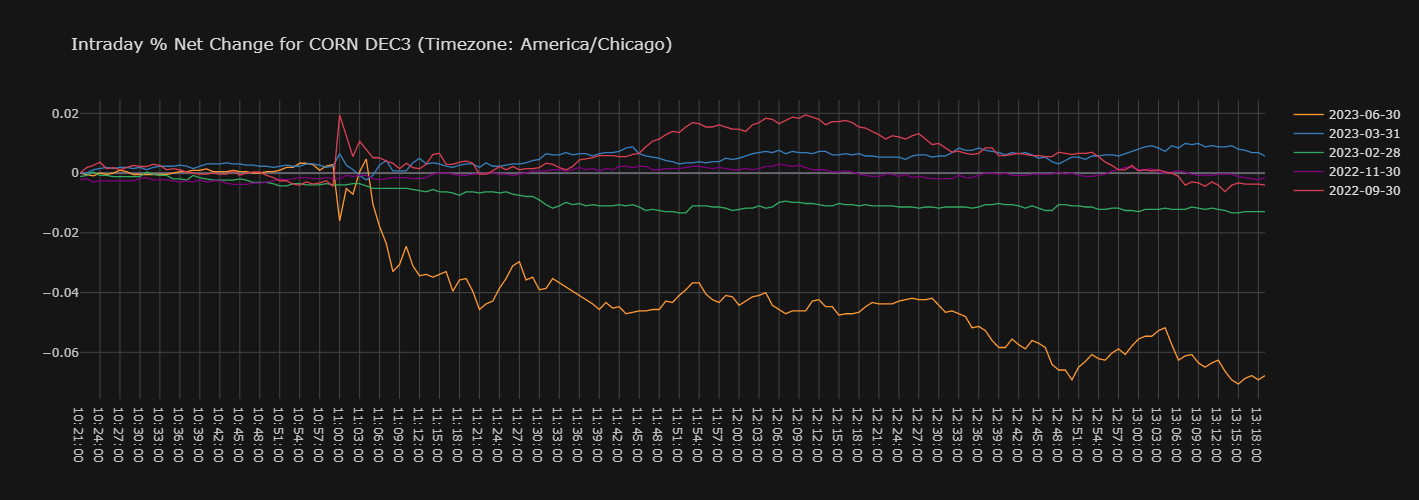

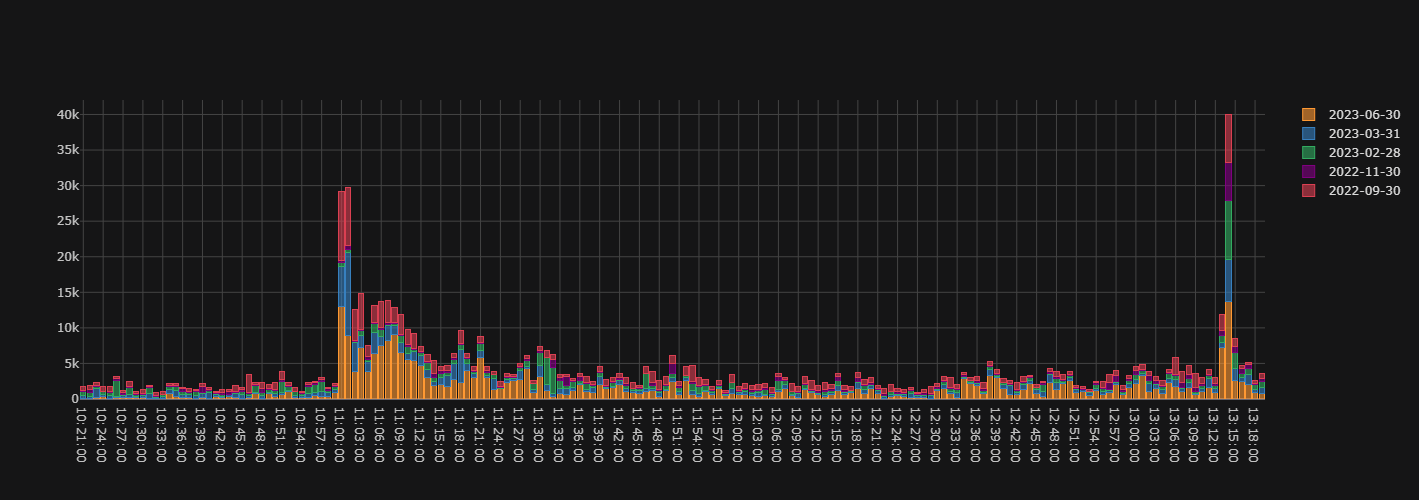

In [18]:
# Plot the results
intraday.plot(f"Intraday % Net Change for {intraday.label}")

In choosing the dates, the goal was to select relevant end-of-month days to detect any abnormal behavior. Specifically, selecting dates that fall on the end-of-quarter could provide more impactful activity - it is worth mentioning that we've left out the end-of-year date as the expected volume of activity is relatively low.

Looking at the results, while we can clearly see some activity in the price chart, it is the volume activity that clearly stands out.  For example, the end-of-quarter dates for the months of September, March and June demonstrate significant activity at around 11 A.M.  Taking the above results at face value, it does appear some specific event occurred at around 11 A.M.  Doing a little research, it is possible the above activity may be a result of a combination of end-of-quarterly rebalancing and also the release of the [Grain Stocks Report](https://usda.library.cornell.edu/concern/publications/xg94hp534).

## Conclusion

With the above tools and the flexibility of evaluating trends, traders and analysts can build many different strategies to manage risk as well as profit by understanding price activity.  The simplicity of generating intraday market reports revolutionizes the way traders and analysts approach market analysis. By streamlining the data compilation process, users can easily dive into the analysis and extract valuable insights. With a clear focus on trends, patterns, and volume dynamics, traders and analysts are empowered to make informed decisions and capitalize on market opportunities with ease.